In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier
import graphviz
from sklearn import tree

In [ ]:
# data
df =  pd.read_csv('https://raw.githubusercontent.com/mckenzie-maidl/data5100-climate-agriculture/main/Cleaned%20Data/apples_years.csv')
df = df.drop(columns = 'Unnamed: 0')
df.head()

,year,ppt,tmin,tmean,tmax,tdewmean,vpdmin,vpdmax,vpddiff,tdiff,yield_acre_lbs,percent_utilized,utilized_per_acre,avg_price_pound_dollars,trees_per_acre
0,1970,144.62,36.515833,48.256667,59.994167,31.793333,1.726083,15.529917,13.803833,23.478333,23600.0,99.856322,23599.320883,0.0507,100.000
1,1971,157.63,36.100000,47.832500,59.564167,32.140833,1.498333,14.965500,13.467167,23.464167,19000.0,99.502488,18867.924528,0.0620,114.625
2,1972,160.07,35.936667,47.560000,59.190833,31.820000,1.539500,14.790417,13.250917,23.254167,20400.0,99.784637,20381.231672,0.0821,129.250
3,1973,151.75,37.214167,48.848333,60.475833,31.831667,2.014167,15.471333,13.457167,23.261667,25800.0,100.000000,25761.772853,0.0840,143.875
4,1974,143.71,37.306667,48.983333,60.665000,32.799167,1.925167,15.160417,13.235250,23.358333,25000.0,100.000000,25013.850416,0.0930,158.500


In [ ]:
# new field
df['all_utilized'] = np.where(df['percent_utilized'] < 100.000000, 0, 1)
df.head()

,year,ppt,tmin,tmean,tmax,tdewmean,vpdmin,vpdmax,vpddiff,tdiff,yield_acre_lbs,percent_utilized,utilized_per_acre,avg_price_pound_dollars,trees_per_acre,all_utilized
0,1970,144.62,36.515833,48.256667,59.994167,31.793333,1.726083,15.529917,13.803833,23.478333,23600.0,99.856322,23599.320883,0.0507,100.000,0
1,1971,157.63,36.100000,47.832500,59.564167,32.140833,1.498333,14.965500,13.467167,23.464167,19000.0,99.502488,18867.924528,0.0620,114.625,0
2,1972,160.07,35.936667,47.560000,59.190833,31.820000,1.539500,14.790417,13.250917,23.254167,20400.0,99.784637,20381.231672,0.0821,129.250,0
3,1973,151.75,37.214167,48.848333,60.475833,31.831667,2.014167,15.471333,13.457167,23.261667,25800.0,100.000000,25761.772853,0.0840,143.875,1
4,1974,143.71,37.306667,48.983333,60.665000,32.799167,1.925167,15.160417,13.235250,23.358333,25000.0,100.000000,25013.850416,0.0930,158.500,1


### Using All Variables

In [ ]:
# test / train

# predictors (X) / response (y) = all_utilized
X = df.loc[:, ~df.columns.isin(['year','yield_acre_lbs','percent_utilized','utilized_per_acre','avg_price_pound_dollars','trees_per_acre','all_utilized'])]
y = df['all_utilized']

# training and test splits of the data (test = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
# instantiate and fit the logistic regression model
log_reg_all = LogisticRegression(penalty = 'none').fit(X_train, y_train).fit(X_train, y_train)
#log_reg_all_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit() #produces error

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### Random Forest

In [ ]:
rf_model = RandomForestClassifier()

params = {
    "n_estimators": randint(75, 150),
    "max_depth": randint(0, 10),
    "min_samples_leaf": randint(0, 10), 
    "min_samples_split": randint(2, 5) 
}

search = RandomizedSearchCV(rf_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f087617f520>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f087617fb20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08760e2370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0876114f70>},
                   return_train_score=True, verbose=1)

In [ ]:
best = search.best_params_
best

{'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 84}

In [ ]:
# fit a random forest classifier model to the training data using all predictors
model_rf = RandomForestClassifier(n_estimators = best['n_estimators'], min_samples_leaf = best['min_samples_leaf'], 
                                  min_samples_split = best['min_samples_split'], max_depth = best['max_depth'])
model_rf.fit(X_train, y_train)

# predict for the test data
pred_rf = model_rf.predict(X_test)
pred_rf

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

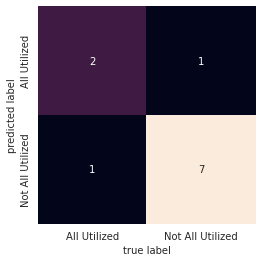

In [ ]:
# show the confusion matrix to visualize the errors
mat_rf = confusion_matrix(y_test, pred_rf)

class_names = ['All Utilized', 'Not All Utilized']
sns.heatmap(mat_rf.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

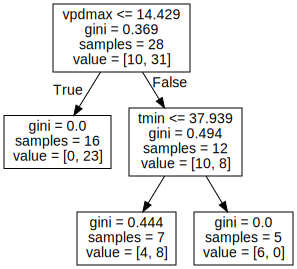

In [ ]:
# plot some of the tree components
tree_data = tree.export_graphviz(model_rf.estimators_[0], out_file=None, feature_names=X.columns) 
graph = graphviz.Source(tree_data) 
graph

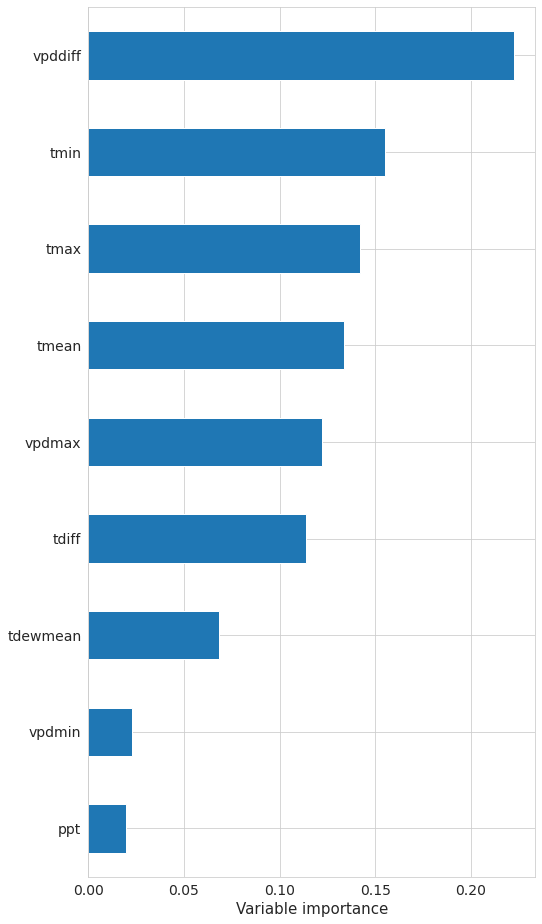

In [ ]:
# plot the variable importances for the random forest model
(pd.DataFrame(dict(cols=X_train.columns, imp=model_rf.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (8,16)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 14);

### Logistic regression for most important variables in the random forest

In [ ]:
# top three
X_train2 = X_train.loc[:, model_rf.feature_importances_ >= np.sort(model_rf.feature_importances_)[-3]]
X_test2 = X_test.loc[:, model_rf.feature_importances_ >= np.sort(model_rf.feature_importances_)[-3]]

log_reg3 = sm.Logit(y_train, sm.add_constant(X_train2)).fit()
print(log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.319314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           all_utilized   No. Observations:                   41
Model:                          Logit   Df Residuals:                       37
Method:                           MLE   Df Model:                            3
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.4718
Time:                        23:18:52   Log-Likelihood:                -13.092
converged:                       True   LL-Null:                       -24.786
Covariance Type:            nonrobust   LLR p-value:                 3.352e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0341     30.984     -0.066      0.948     -62.761      58.693
tmin          -3.5587      1.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


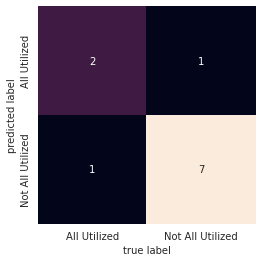

In [ ]:
# evaluate the model accuracy
prob_pred3 = log_reg3.predict(sm.add_constant(X_test2))
pred3 = prob_pred3.round()
mat3 = confusion_matrix(y_test, pred3)
sns.heatmap(mat3.T, square=True, annot=True, cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
# accuracy
np.sum(np.diag(mat3))/np.sum(mat3)

# specificity


0.8181818181818182